In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/idp_bootcamp/financial_document_dataset

/content/drive/MyDrive/idp_bootcamp/financial_document_dataset


In [ ]:
!ls

documents


Layout detection

In [ ]:
!python3 -m pip install --upgrade pip
!python3 -m pip install paddlepaddle-gpu

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [ ]:
!pip install paddleocr

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 98.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114250 sha256=1a6ee1b1ecd34a7237e82570777fc96e97ac94f59be3091e9d1751d5957054c4
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [ ]:
!pip install premailer

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 51711, done.
remote: Counting objects: 100% (781/781), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 51711 (delta 579), reused 727 (delta 551), pack-reused 50930 (from 1)
Receiving objects: 100% (51711/51711), 386.83 MiB | 12.59 MiB/s, done.
Resolving deltas: 100% (36277/36277), done.
Updating files: 100% (2396/2396), done.


In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleDetection.git

Cloning into 'PaddleDetection'...
remote: Enumerating objects: 257864, done.
remote: Counting objects: 100% (748/748), done.
remote: Compressing objects: 100% (401/401), done.
remote: Total 257864 (delta 497), reused 534 (delta 347), pack-reused 257116 (from 1)
Receiving objects: 100% (257864/257864), 421.80 MiB | 17.59 MiB/s, done.
Resolving deltas: 100% (210204/210204), done.
Updating files: 100% (2072/2072), done.


In [ ]:
##import packages
from paddleocr import PPStructure, draw_structure_result, save_structure_res
import cv2
from PIL import Image
import os

In [ ]:
# Initialize the PP-Structure model for layout detection
structure_model = PPStructure(show_log=True)


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar to /root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer/ch_PP-OCRv4_det_infer.tar


100%|██████████| 4.89M/4.89M [00:18<00:00, 263kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer/ch_PP-OCRv4_rec_infer.tar


100%|██████████| 11.0M/11.0M [00:20<00:00, 523kiB/s] 


download https://paddleocr.bj.bcebos.com/ppstructure/models/slanet/ch_ppstructure_mobile_v2.0_SLANet_infer.tar to /root/.paddleocr/whl/table/ch_ppstructure_mobile_v2.0_SLANet_infer/ch_ppstructure_mobile_v2.0_SLANet_infer.tar


100%|██████████| 10.3M/10.3M [00:20<00:00, 498kiB/s] 


download https://paddleocr.bj.bcebos.com/ppstructure/models/layout/picodet_lcnet_x1_0_fgd_layout_cdla_infer.tar to /root/.paddleocr/whl/layout/picodet_lcnet_x1_0_fgd_layout_cdla_infer/picodet_lcnet_x1_0_fgd_layout_cdla_infer.tar


100%|██████████| 10.1M/10.1M [00:19<00:00, 522kiB/s] 

[2024/10/11 06:05:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [ ]:
img_path = '/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Bank Statement/10.jpg'
#img_path ='/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/Check/100.jpg'
img = cv2.imread(img_path)

In [ ]:
img

In [ ]:
# Perform layout detection
result = structure_model(img)
image_name = os.path.basename(img_path)
# Draw the layout detection result
save_folder = '/content/drive/MyDrive/idp_bootcamp/week2_outputs_structure'
save_structure_res(result, save_folder, image_name)

[2024/10/11 06:06:06] ppocr DEBUG: dt_boxes num : 70, elapsed : 0.20482158660888672
[2024/10/11 06:06:07] ppocr DEBUG: rec_res num  : 70, elapsed : 0.7479674816131592
[2024/10/11 06:06:07] ppocr DEBUG: dt_boxes num : 38, elapse : 0.03925919532775879
[2024/10/11 06:06:07] ppocr DEBUG: rec_res num  : 38, elapse : 0.13676667213439941


In [ ]:
# Draw the result on the image for visualization
image = Image.open(img_path).convert('RGB')
draw_img = draw_structure_result(image, result, font_path='/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/PaddleOCR/doc/fonts/latin.ttf')
draw_img.size
#draw_img = draw_structure_result(image, result, font_path='/content/drive/MyDrive/idp_bootcamp/Week2_bootcamp/PaddleOCR/doc/fonts/french.ttf')

4968000

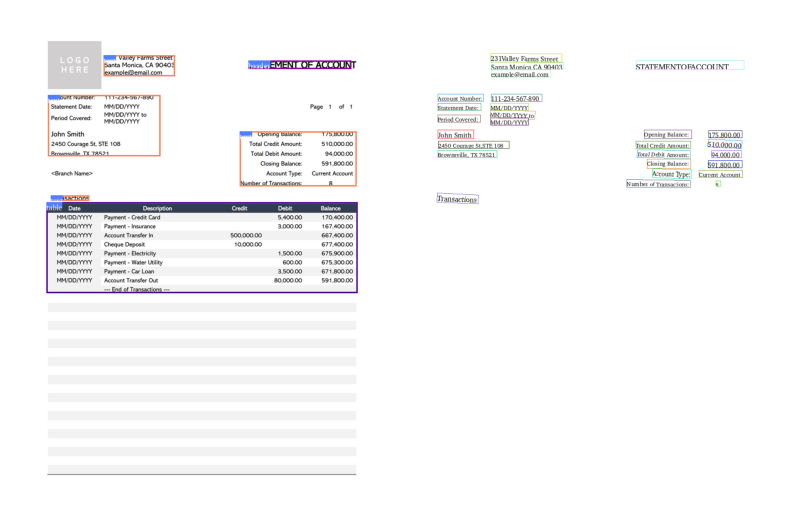

In [ ]:
# Save the output image
import matplotlib.pyplot as plt
# Display the image in the Colab notebook using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(draw_img)
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
# Assuming 'draw_img' is a NumPy array
import numpy as np
draw_img = np.array(draw_img)  # Your detected layout result

# Convert NumPy array to PIL Image
draw_img_pil = Image.fromarray(draw_img)

# Save the PIL Image
draw_img_pil.save('/content/drive/MyDrive/idp_bootcamp/week2_outputs_structure/layout_image1.png')

Document classification using Image classification

In [ ]:
import os
import pandas as pd
import numpy as np
import random
import sys
import gc
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import PIL
from PIL import Image
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras import layers, metrics, optimizers, models, preprocessing
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16

In [ ]:
images = '/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents'
PATH = './'

classes = (os.listdir(images))

paths = [os.path.join(images, o) for o in os.listdir(images)
                    if os.path.isdir(os.path.join(images,o))]

nbEntries = []

for i in range(len(classes)):
    nbEntries.append(len(os.listdir(paths[i])))

print(classes)
print(nbEntries)


['Utility', 'Bank Statement', 'Salary Slip']
[99, 99, 96]


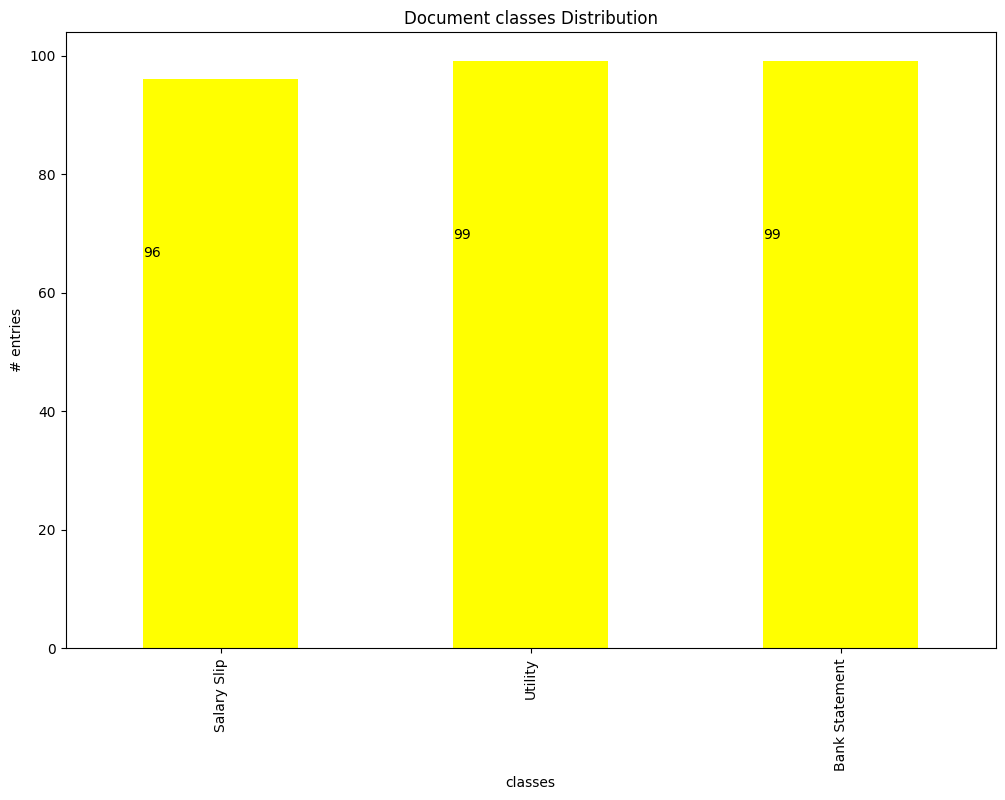

In [ ]:
df = pd.DataFrame({'classes':classes, 'entries':nbEntries})
ax = df.sort_values(by='entries', ascending=True).plot.bar(x='classes', y='entries', color='yellow',legend=False, figsize=(12,8))
ax.set_title('Document classes Distribution')
ax.set_ylabel("# entries")
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()-30))

In [ ]:
# Initialize parameters
img_size = 224
batch_size = 32
train_size = 0.7
valid_size = 0.15  # New validation size parameter
test_size = 0.15
seed = 4321
channels = 3
learning_rate = 0.00001
epochs = 10


In [ ]:
total_set = []  #append data to this list
# Loop through each folder
for folder in paths:
    # Walk through the directory and its subdirectories
    for root, dirs, files in os.walk(folder):
        for file in files:
            # Check if the file is an image (you can adjust this based on your image types)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Add the full path of the image to the total_set list
                total_set.append(os.path.join(root, file))

/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Utility/99.jpg


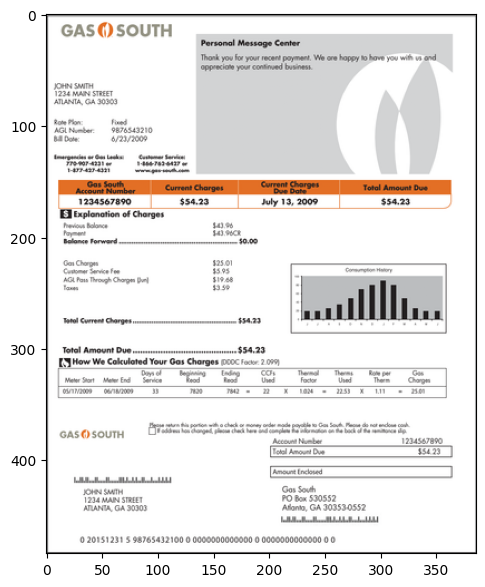

/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Salary Slip/64.jpg


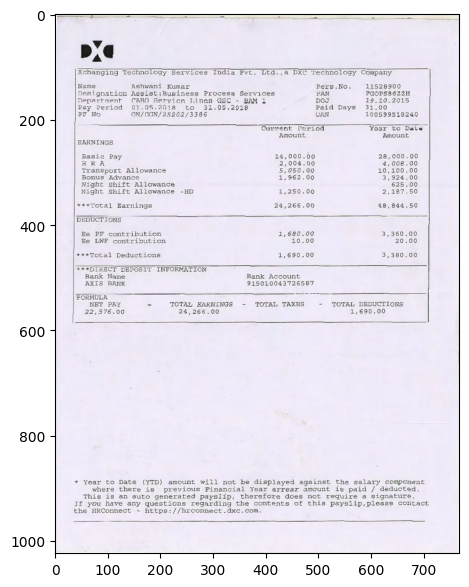

/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Salary Slip/54.jpg


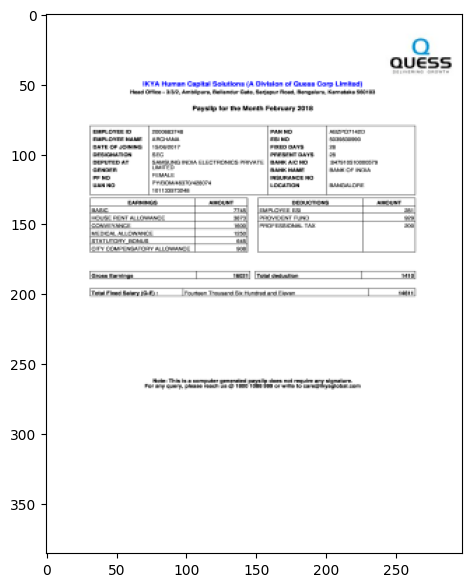

In [ ]:
random.Random(seed).shuffle(total_set)

for ima in total_set[0:3]:

    print(ima)
    img = mpimg.imread(ima)
    plt.figure(figsize=(7,7))
    imgplot = plt.imshow(img, cmap="gray")
    plt.show()

In [ ]:
def get_label_from_path(file_path):
    # Split the path into its components
    path_parts = file_path.split(os.sep)

    # Get the second-to-last part of the path which is the folder name (the label)
    label = path_parts[-2]

    return label

In [ ]:
# # Get data and separate it into training, validation, and test sets
# total_len = len(total_set)
# print(total_len)
# index=0

# # Initialize sets and labels
# train_set = []
# train_label = []

# valid_set = []
# valid_label = []

# test_set = []
# test_label = []

# # Calculate indices for the splits
# train_end_idx = int(total_len * train_size)
# valid_end_idx = train_end_idx + int(total_len * valid_size)

# # Fill training set
# for i in total_set[:train_end_idx]:
#     train_set.append(i)
#     train_label.append(get_label_from_path(i))

# # Fill validation set
# for i in total_set[train_end_idx:valid_end_idx]:
#     valid_set.append(i)
#     valid_label.append(get_label_from_path(i))
# index = int(total_len*train_size)+1

# # Fill test set
# for i in total_set[valid_end_idx:]:
#     test_set.append(i)
#     test_label.append(get_label_from_path(i))

# # Print sample data from each set
# print(train_set[10])
# print(train_label[10])

# print(valid_set[10])
# print(valid_label[10])

# print(test_set[10])
# print(test_label[10])

# total_len = len(total_set)
# print(total_len)
# index = 0

# train_set = []
# train_label = []

# test_set = []
# test_label = []

# valid_set = []
# valid_label = []


# for i in total_set[0: int(total_len*train_size)] :
#     train_set.append(i)
#     train_label.append(get_label_from_path(i))

# index = int(total_len*train_size)+1

# index = int(total_len*train_size)+1
# for i in total_set[index: total_len] :
#     test_set.append(i)
#     test_label.append(get_label_from_path(i))

# print(train_set[10])
# print(train_label[10])
# print(total_len)



In [ ]:
total_len = len(total_set)
print(total_len)

# Initialize sets and labels
train_set = []
train_label = []

valid_set = []
valid_label = []

test_set = []
test_label = []

# Calculate indices for train, validation, and test sets
train_end = int(total_len * train_size)
valid_end = train_end + int(total_len * valid_size)

# Populate the train set and labels
for i in total_set[:train_end]:
    train_set.append(i)
    train_label.append(get_label_from_path(i))

# Populate the validation set and labels
for i in total_set[train_end:valid_end]:
    valid_set.append(i)
    valid_label.append(get_label_from_path(i))

# Populate the test set and labels
for i in total_set[valid_end:]:
    test_set.append(i)
    test_label.append(get_label_from_path(i))

# Print samples to verify
print(train_set[10])
print(train_label[10])
print(total_len)
print(valid_set[10])


294
/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Utility/59.jpg
Utility
294
/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Bank Statement/44.jpg


In [ ]:


import cv2
from PIL import Image
import numpy as np

def process_images(img_set, img_size):
    processed_img = []

    for img_path in img_set:
        try:

            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            if img is None:

                img = Image.open(img_path)
                img = img.convert("RGB")
                img = np.array(img)
                img = cv2.resize(img, (img_size, img_size))
            else:
                img = cv2.resize(img, (img_size, img_size))
            processed_img.append(img)
        except Exception as e:
            print(f"Error: Could not process image at path '{img_path}'. Error: {e}")
            continue

    return processed_img

img_size = 224
data_train = process_images(train_set, img_size)
data_test = process_images(test_set, img_size)
data_valid = process_images(valid_set, img_size)





In [ ]:
lb = LabelBinarizer()
lb.fit(list(classes))

x_train = np.array(data_train)
y_train =lb.transform(np.array(train_label))

x_test = np.array(data_test)
y_test = lb.transform(np.array(test_label))


x_valid = np.array(data_valid)
y_valid = lb.transform(np.array(valid_label))

In [ ]:
y_test

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [ ]:
x_valid

array([[[[ 26,  31,  29],
         [ 31,  38,  35],
         [ 36,  41,  39],
         ...,
         [201, 216, 212],
         [198, 215, 212],
         [202, 219, 216]],

        [[ 20,  27,  24],
         [ 36,  43,  40],
         [ 31,  36,  34],
         ...,
         [198, 213, 209],
         [202, 216, 214],
         [198, 216, 213]],

        [[  8,  15,  12],
         [ 23,  31,  28],
         [ 34,  37,  35],
         ...,
         [204, 218, 214],
         [205, 220, 216],
         [201, 215, 213]],

        ...,

        [[115, 146, 156],
         [100, 130, 141],
         [108, 130, 135],
         ...,
         [157, 170, 169],
         [165, 180, 178],
         [160, 175, 172]],

        [[ 99, 129, 138],
         [103, 134, 145],
         [ 96, 121, 125],
         ...,
         [163, 183, 181],
         [158, 178, 177],
         [162, 182, 180]],

        [[109, 140, 148],
         [122, 154, 165],
         [111, 137, 143],
         ...,
         [ 99, 119, 120],
        

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)
print(y_test.shape)
print(y_train.shape)
print(y_valid.shape)

(205, 224, 224, 3)
(45, 224, 224, 3)
(44, 224, 224, 3)
(45, 3)
(205, 3)
(44, 3)


In [ ]:
print(train_label[0])
print(y_train[0])
print(lb.classes_)

In [ ]:
base_model = VGG16(weights = "imagenet", include_top=False, input_tensor=Input(shape=(img_size, img_size, channels)))
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(classes)

3

In [ ]:
# Build the complete model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', name='dense'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', name='dense2'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(classes), activation='softmax', name='predictions'))
# Build the model explicitly to define output shapes
model.build((None, img_size, img_size, channels))
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,626,307 (105.39 MB)

 Trainable params: 27,626,307 (105.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

train_model = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=30,
                        verbose=1,
                        validation_data=(x_test, y_test))

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 100s 8s/step - accuracy: 0.3545 - loss: 18.7360 - val_accuracy: 0.4667 - val_loss: 2.4831
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 486ms/step - accuracy: 0.3486 - loss: 6.5669 - val_accuracy: 0.4222 - val_loss: 1.6611
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step - accuracy: 0.4009 - loss: 3.4328 - val_accuracy: 0.4222 - val_loss: 1.5074
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 469ms/step - accuracy: 0.3509 - loss: 3.1703 - val_accuracy: 0.3778 - val_loss: 1.4499
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 498ms/step - accuracy: 0.3182 - loss: 2.8404 - val_accuracy: 0.4222 - val_loss: 1.3834
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 500ms/step - accuracy: 0.4879 - loss: 2.0568 - val_accuracy: 0.4000 - val_loss: 1.3923
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 489ms/step - accuracy: 0.4226 - loss: 1.9043 - val_accuracy: 0.3778 - val_loss: 1.3592
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step - accuracy: 0.4840 - loss: 1.4066 - val_accuracy: 0.4444 - val_loss

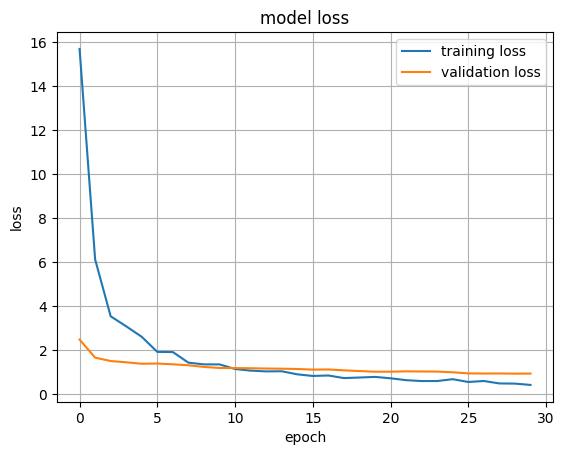

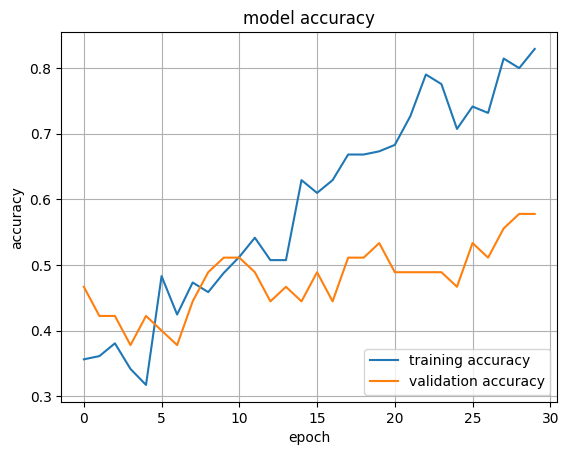

In [ ]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('model accuracy')
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [ ]:
predictions = model.predict(x_test, verbose=1)
predicted_classes = lb.classes_

count_true = 0
count_false = 0

for i, prediction in enumerate(predictions):
    prediction_index = np.argmax(prediction)  # Get the index of the maximum value
    if predicted_classes[prediction_index] == test_label[i]:
        count_true += 1
        state = True
    else:
        count_false += 1
        state = False
    print("Prediction:", predicted_classes[prediction_index], "| Real class:", test_label[i], "| Result:", state)

print("\nNumber of success:", count_true)
print("Number of errors:", count_false)
print("Error rate:", count_false / len(test_label))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
Prediction: Salary Slip | Real class: Salary Slip | Result: True
Prediction: Utility | Real class: Utility | Result: True
Prediction: Utility | Real class: Bank Statement | Result: False
Prediction: Bank Statement | Real class: Utility | Result: False
Prediction: Bank Statement | Real class: Utility | Result: False
Prediction: Utility | Real class: Salary Slip | Result: False
Prediction: Utility | Real class: Utility | Result: True
Prediction: Utility | Real class: Utility | Result: True
Prediction: Utility | Real class: Salary Slip | Result: False
Prediction: Utility | Real class: Salary Slip | Result: False
Prediction: Bank Statement | Real class: Bank Statement | Result: True
Prediction: Salary Slip | Real class: Salary Slip | Result: True
Prediction: Bank Statement | Real class: Bank Statement | Result: True
Prediction: Bank Statement | Real class: Bank Statement | Result: True
Prediction: Utility | Real class: Salary Slip | Result: False
Pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


<Figure size 1000x800 with 0 Axes>

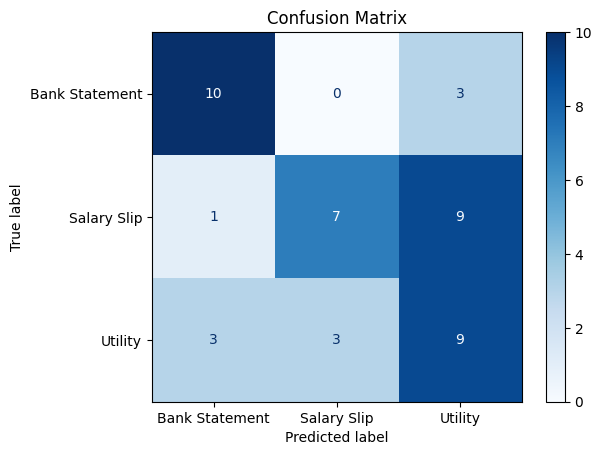

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Step 1: Get predictions and predicted classes
predictions = model.predict(x_test, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices

# Assuming `test_label` contains the true labels as class indices
# If test_label is in string format, convert it to indices based on lb.classes_
true_classes = np.argmax(y_test, axis=1) # Ensure this is an array of class indices

# Step 2: Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 3: Visualize confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lb.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()



*   The model has reasonably good accuracy for each class, as the highest values are along the diagonal, showing correct classifications.
There's a bit of confusion between "Utility" and the other
two classes, as it has more misclassifications,as an example 3 with "Bank Statement" and 1 with "Salary Slip". This may indicate some overlap in features between these document types that the model is struggling to differentiate.




Unsupervised classification for tet documents

In [ ]:
!pip install pytesseract

In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (22.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
#import Necessary pacakges
import os
import pytesseract
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
def create_dataset(folders):
    data = []

    for folder in folders:
        for filename in os.listdir(folder):
            if filename.endswith(('.png', '.jpg', '.jpeg', '.pdf')):  # Add more image types if needed
                file_path = os.path.join(folder, filename)
                try:
                    # Open the image using PIL
                    img = Image.open(file_path)

                    # Use pytesseract to extract text from the image
                    text = pytesseract.image_to_string(img)

                    # Get the folder name as the document type
                    doc_type = os.path.basename(folder)

                    # Append extracted text and document type to data
                    data.append({'text': text, 'doc_type': doc_type})
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    return pd.DataFrame(data)

In [ ]:
folders = os.listdir("/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents")
folders = [os.path.join("/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents", folder) for folder in folders]
print(folders)
dataset = create_dataset(folders)

# Display the first few rows of the dataset
print(dataset.head())

['/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Utility', '/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Bank Statement', '/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Salary Slip']
Error processing /content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Utility/53.jpg: cannot identify image file '/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Utility/53.jpg'
Error processing /content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Utility/86.jpg: cannot identify image file '/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/documents/Utility/86.jpg'
                                                text doc_type
0  = ABC Powers Inc.\n\nimal\n(reared\nEU Teg Alc...  Utility
1  . FD ings com gusto: 40.782250 WD sccount numb...  Utility
2  SERVICE FOR BILLING PERIOD PAGE 1 of 4\n\n \n\...  Utility
3   \n\nCITY OF LEON + 104 W. 1ST STREET +

In [ ]:
dataset.head()

,text,doc_type
0,= ABC Powers Inc.\n\nimal\n(reared\nEU Teg Alc...,Utility
1,. FD ings com gusto: 40.782250 WD sccount numb...,Utility
2,SERVICE FOR BILLING PERIOD PAGE 1 of 4\n\n \n\...,Utility
3,"\n\nCITY OF LEON + 104 W. 1ST STREET + LEON, ...",Utility
4,cco ae UN Rae\n\nAEN(ORNBajJud\ney\n\n \n\n \n...,Utility


In [ ]:
dataset.to_csv('document_dataset.csv',index=False)

In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/document_dataset.csv")

In [ ]:
!pip install gensim

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
import nltk
from nltk.corpus import stopwords

# Ensure you have NLTK stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and",
    "any", "are", "aren't", "as", "at", "be", "because", "been", "before", "being",
    "below", "between", "both", "but", "by", "can", "can't", "cannot", "could",
    "couldn't", "did", "didn't", "do", "doesn't", "doing", "don't", "down", "during",
    "each", "few", "for", "further", "had", "hadn't", "has", "hasn't", "have",
    "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers",
    "herself", "him", "himself", "his", "how", "how's", "I", "I'd", "I'll", "I'm",
    "I've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "just",
    "ll", "m", "me", "might", "mightn't", "more", "most", "must", "mustn't", "my",
    "myself", "need", "needn't", "no", "nor", "not", "off", "once", "only",
    "or", "other", "our", "ours", "ourselves", "out", "over", "own", "same", "shan't",
    "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "t",
    "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then",
    "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've",
    "this", "those", "through", "too", "under", "until", "up", "very", "was",
    "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what",
    "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's",
    "whom", "why", "why's", "will", "with", "won't", "would", "wouldn't", "you",
    "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves","university","on","of"
]

In [ ]:
# Preprocess the text
#stop_words = set(stopwords.words('english'))
import re
# def preprocess(text):
#     return [word for word in text.lower().split() if word.isalpha() and word not in stop_words]
# Define a function for text cleaning and preprocessing
def preprocess(text):
    # Remove metadata (assuming simple line filters)
    #text = re.sub(r'^(Subject:|To:|From:|Attachments:).*$', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    words = text.split()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    stop_words.discard('from')
    stop_words.discard('to')
    words = [word for word in words if word not in stop_words]
    return words

using doc2Bow

In [ ]:
# Create a dictionary and corpus for LDA
processed_texts = dataset['text'].apply(preprocess)
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

using word2vec

In [ ]:
from gensim.models import Word2Vec
import numpy as np
# Train Word2Vec on processed texts
word2vec_model = Word2Vec(sentences=processed_texts, vector_size=100, window=5, min_count=2, workers=4)

# Get word vectors
word_vectors = word2vec_model.wv

# Convert each text into a vector by averaging the word vectors
def vectorize_text(text):
    vectors = [word_vectors[word] for word in text if word in word_vectors]
    if len(vectors) == 0:
        return np.zeros(100)
    else:
        return np.mean(vectors, axis=0)

processed_texts = dataset['text'].apply(preprocess)
corpus_word2vec = np.array([vectorize_text(text) for text in processed_texts])



*   Word2Vec Useful for tasks requiring understanding of word level semantics, such as similarity searches, language translation, sentiment analysis, and named entity recognition.
Doc2Bow is Commonly used for topic modeling (Latent Dirichlet Allocation (LDA)), text classification, and document similarity tasks where word frequency is more important than semantic meaning.




In [ ]:
# Build the LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Print the topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.009*"total" + 0.009*"account" + 0.009*"to" + 0.008*"bank" + 0.008*"name" + 0.008*"balance" + 0.007*"salary" + 0.007*"amount" + 0.007*"pay" + 0.006*"employee"')
(1, '0.016*"account" + 0.010*"date" + 0.009*"payment" + 0.009*"total" + 0.009*"amount" + 0.009*"to" + 0.008*"charges" + 0.008*"number" + 0.008*"due" + 0.008*"balance"')
(2, '0.011*"apr" + 0.010*"balance" + 0.009*"to" + 0.009*"account" + 0.008*"payment" + 0.008*"date" + 0.006*"debit" + 0.006*"jul" + 0.006*"total" + 0.006*"bank"')


Using BERT embeddings

In [ ]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/document_dataset.csv")
dataset.head(5)

,text,doc_type
0,= ABC Powers Inc.\n\nimal\n(reared\nEU Teg Alc...,Utility
1,. FD ings com gusto: 40.782250 WD sccount numb...,Utility
2,SERVICE FOR BILLING PERIOD PAGE 1 of 4\n\n \n\...,Utility
3,"\n\nCITY OF LEON + 104 W. 1ST STREET + LEON, ...",Utility
4,cco ae UN Rae\n\nAEN(ORNBajJud\ney\n\n \n\n \n...,Utility


In [ ]:
!pip install transformers sentence-transformers umap-learn hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 99.2 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load the BERT-based sentence transformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Generate embeddings
embeddings = model.encode(dataset['text'].values)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Reduce dimensionality to 2D for visualization
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_reduced = reducer.fit_transform(embeddings)

HDBSCAN for clustering

In [ ]:
# Apply HDBSCAN for clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=6)#min_cluster size is greater than one
cluster_labels = clusterer.fit_predict(embeddings_reduced)

In [ ]:
dataset['predicted_cluster'] = cluster_labels

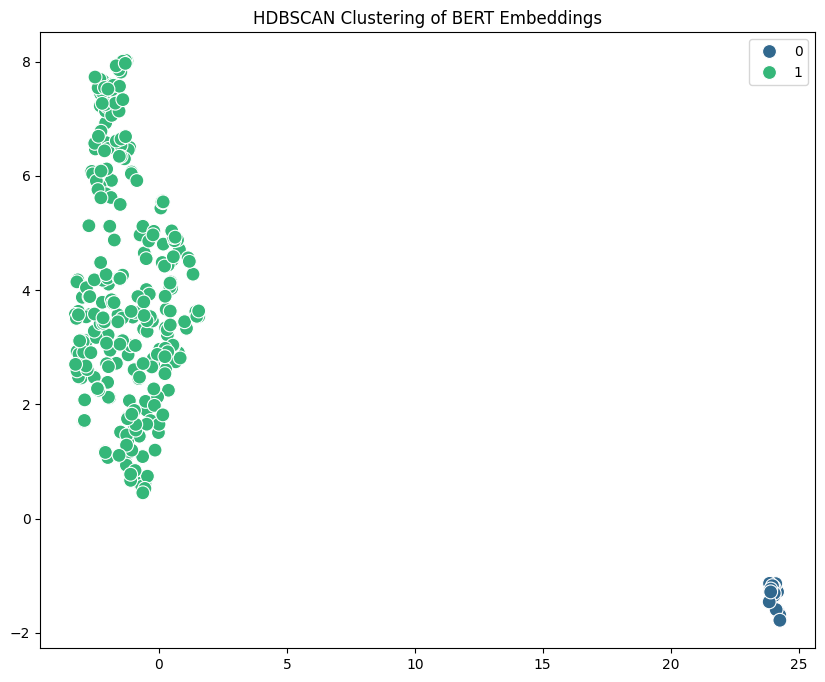

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_reduced[:, 0], y=embeddings_reduced[:, 1],
                hue=cluster_labels, palette='viridis', s=100)

plt.title("HDBSCAN Clustering of BERT Embeddings")
plt.show()

In [ ]:
# Compare cluster labels with actual document types
comparison = pd.crosstab(dataset['doc_type'], dataset['predicted_cluster'])
print(comparison)

predicted_cluster   0   1
doc_type                 
Bank Statement      1  98
Salary Slip        10  86
Utility             7  90


KMEANS for clustering

In [ ]:
#kmeans clustering use to identify the no. of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_reduced)

# Add cluster labels to the dataframe
dataset['predicted_cluster_kmean'] = cluster_labels

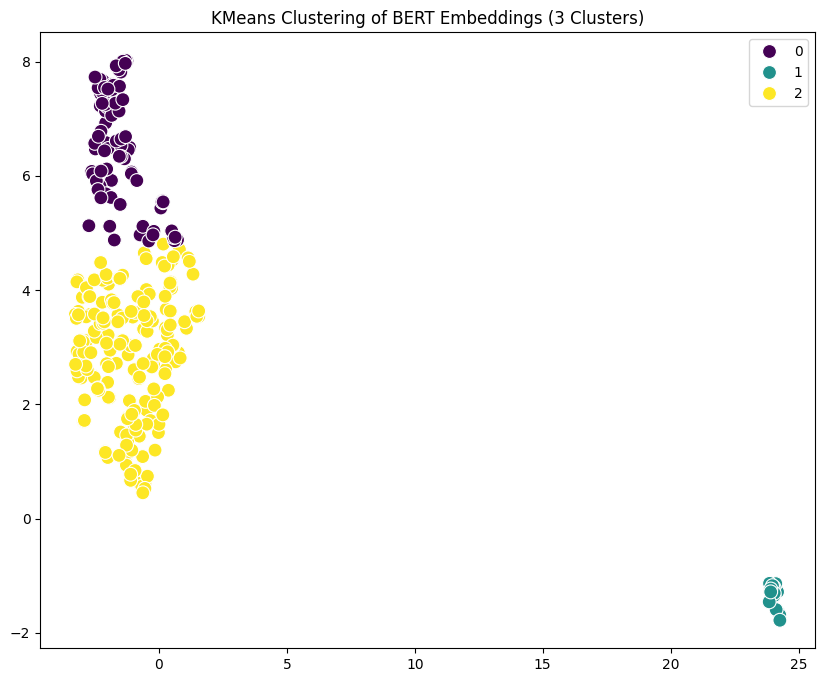

In [ ]:
# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embeddings_reduced[:, 0], y=embeddings_reduced[:, 1],
                hue=cluster_labels, palette='viridis', s=100)

plt.title("KMeans Clustering of BERT Embeddings (3 Clusters)")
plt.show()

In [ ]:
# Compare cluster labels with actual document types
comparison = pd.crosstab(dataset['doc_type'], dataset['predicted_cluster_kmean'])
print(comparison)

predicted_cluster_kmean   0   1   2
doc_type                           
Bank Statement           13   1  85
Salary Slip              69  10  17
Utility                   5   7  85


RULE BASED CLASSIFICATION

In [ ]:
import pandas as pd
from collections import Counter
from nltk.corpus import stopwords
import string

In [ ]:
# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocess function (removing stopwords and punctuation)
def preprocess_text(text):
    tokens = text.lower().split()  # Tokenize and lowercase
    return [word for word in tokens if word not in stop_words and word not in punctuation]


In [ ]:
# Apply preprocessing to the dataset
dataset['processed_text'] = dataset['text'].apply(preprocess_text)

In [ ]:
# Function to get top N words for each label
def get_top_words(label, n=10):
    # Get all texts for the given label
    label_texts = dataset[dataset['doc_type'] == label]['processed_text']

    # Combine all words from all documents in the label
    all_words = [word for text in label_texts for word in text]

    # Get word frequencies using Counter
    word_freq = Counter(all_words)

    # Return the top N words
    return word_freq.most_common(n)


In [ ]:
# Get unique labels
labels = dataset['doc_type'].unique()
keys = {}
# Print top 10 words for each label
for label in labels:
    top_words = get_top_words(label, n=15)
    print(f"Top 10 words for {label}:")
    print(top_words)
    words = []
    for word_tuple in top_words:
        words.append(word_tuple[0])
    keys[label] = words
    print("\n")

print(keys)

Top 10 words for Utility:
[('charges', 123), ('due', 117), ('amount', 104), ('date', 94), ('bill', 88), ('total', 88), ('payment', 84), ('account', 80), ('service', 76), ('water', 63), ('gas', 59), ('ee', 53), ('previous', 52), ('usage', 50), ('current', 50)]


Top 10 words for Bank Statement:
[('account', 230), ('balance', 213), ('payment', 137), ('statement', 106), ('debit', 104), ('bank', 99), ('date', 81), ('1', 79), ('number', 76), ('apr', 70), ('deposit', 69), ('0.00', 68), ('card', 67), ('jul', 67), ('total', 65)]


Top 10 words for Salary Slip:
[('pay', 121), ('salary', 103), ('allowance', 100), ('total', 98), ('tax', 80), ('name', 77), ('deductions', 75), ('bank', 72), ('employee', 71), ('earnings', 65), ('amount', 58), ('rs.', 55), ('basic', 53), ('slip', 53), ('days', 45)]


{'Utility': ['charges', 'due', 'amount', 'date', 'bill', 'total', 'payment', 'account', 'service', 'water', 'gas', 'ee', 'previous', 'usage', 'current'], 'Bank Statement': ['account', 'balance', 'payment

Fuzzy based similarity matching of tokens

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz
import pandas as pd


In [ ]:
def predict_label(text, label_keywords):
    # Dictionary to store the average ratio for each label
    avg_ratios = {}

    # Loop over each label and its keywords
    for label, keywords in label_keywords.items():
        total_ratio = 0
        # Compute the fuzzy ratio for each keyword
        for keyword in keywords:
            total_ratio += fuzz.ratio(text, keyword)
        # Compute the average ratio for this label
        avg_ratios[label] = total_ratio / len(keywords)

    # Return the label with the highest average ratio
    predicted_label = max(avg_ratios, key=avg_ratios.get)
    return predicted_label, avg_ratios

In [ ]:
# Apply the prediction function to the dataset
dataset['predicted_label'] = dataset['text'].apply(lambda x: predict_label(x, keys)[0])

# Optional: print the average ratios for each document
dataset['avg_ratios'] = dataset['text'].apply(lambda x: predict_label(x, keys)[1])


In [ ]:
# Show results
df = dataset[['text', 'doc_type', 'predicted_label', 'avg_ratios']]
df.head()

,text,doc_type,predicted_label,avg_ratios
0,= ABC Powers Inc.\n\nimal\n(reared\nEU Teg Alc...,Utility,Utility,"{'Utility': 1.2666666666666666, 'Bank Statemen..."
1,. FD ings com gusto: 40.782250 WD sccount numb...,Utility,Utility,"{'Utility': 0.6666666666666666, 'Bank Statemen..."
2,SERVICE FOR BILLING PERIOD PAGE 1 of 4\n\n \n\...,Utility,Utility,"{'Utility': 0.4666666666666667, 'Bank Statemen..."
3,"\n\nCITY OF LEON + 104 W. 1ST STREET + LEON, ...",Utility,Bank Statement,"{'Utility': 1.6666666666666667, 'Bank Statemen..."
4,cco ae UN Rae\n\nAEN(ORNBajJud\ney\n\n \n\n \n...,Utility,Utility,"{'Utility': 6.866666666666666, 'Bank Statement..."


In [ ]:
###tokenize the test and then do the fuzzy matching and get the scores


In [ ]:
df=dataset['avg_ratios']
df

,avg_ratios
0,"{'Utility': 1.2666666666666666, 'Bank Statemen..."
1,"{'Utility': 0.6666666666666666, 'Bank Statemen..."
2,"{'Utility': 0.4666666666666667, 'Bank Statemen..."
3,"{'Utility': 1.6666666666666667, 'Bank Statemen..."
4,"{'Utility': 6.866666666666666, 'Bank Statement..."
...,...
287,"{'Utility': 1.4666666666666666, 'Bank Statemen..."
288,"{'Utility': 3.1333333333333333, 'Bank Statemen..."
289,"{'Utility': 1.4, 'Bank Statement': 1.333333333..."
290,"{'Utility': 1.7333333333333334, 'Bank Statemen..."


In [ ]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=9df9337959a2e70d21bb660a9371dfc0c46b87f7952181d75fc6a2089ca7f197
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import swifter
from nltk.tokenize import word_tokenize
from rapidfuzz import fuzz


dataset = pd.read_csv("/content/drive/MyDrive/idp_bootcamp/financial_document_dataset/document_dataset.csv")
df = dataset[['text', 'doc_type']]

df['tokenized_text'] = df['text'].swifter.apply(word_tokenize)


def fuzzy_score(text1, reference_text):
    return fuzz.ratio(text1, reference_text)


reference_text = "some reference text"
df['fuzzy_score'] = df['text'].swifter.apply(lambda x: fuzzy_score(x, reference_text))

print(df[['text', 'tokenized_text', 'fuzzy_score']])


Pandas Apply:   0%|          | 0/292 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/292 [00:00<?, ?it/s]

                                                  text  \
0    = ABC Powers Inc.\n\nimal\n(reared\nEU Teg Alc...   
1    . FD ings com gusto: 40.782250 WD sccount numb...   
2    SERVICE FOR BILLING PERIOD PAGE 1 of 4\n\n \n\...   
3     \n\nCITY OF LEON + 104 W. 1ST STREET + LEON, ...   
4    cco ae UN Rae\n\nAEN(ORNBajJud\ney\n\n \n\n \n...   
..                                                 ...   
287   \n\nCompany Name\n‘Swiggy bundl technology pr...   
288   \n\n‘Company Name\n\nPAYSLIP\n\n \n \n\n \n\n...   
289  Employee Name\nEmployee ID\nDesignation\nDepar...   
290  Payslip\nZoonodle Inc\n\n21023 Pearson Point R...   
291   \n\n‘COMPANY NAME\n\n \n\n‘Address of the Com...   

                                        tokenized_text  fuzzy_score  
0    [=, ABC, Powers, Inc., imal, (, reared, EU, Te...     4.337349  
1    [., FD, ings, com, gusto, :, 40.782250, WD, sc...     2.035351  
2    [SERVICE, FOR, BILLING, PERIOD, PAGE, 1, of, 4...     1.604052  
3    [CITY, OF, LEON, +